In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

from scipy.stats import gamma

In [2]:
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

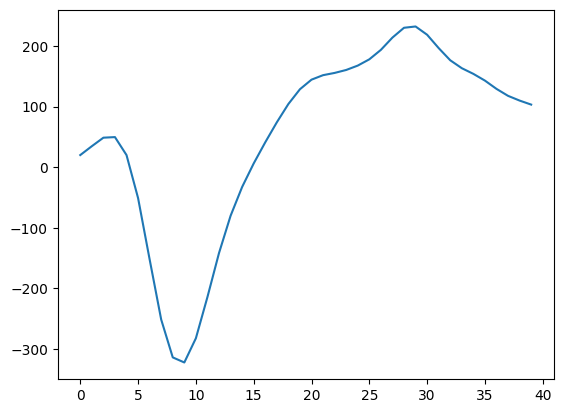

In [3]:
# load some saved waveforms

directory = r'C:\Users\joshs\Documents\Open Ephys\2022-12-24_18-59-20\Record Node 105\experiment1\recording1\spikes\Spike_Detector-103.example_data\Electrode 1'

waveforms = np.load(os.path.join(directory, 'waveforms.npy'))

wv = waveforms[40,:] * 0.195
plt.plot(wv)

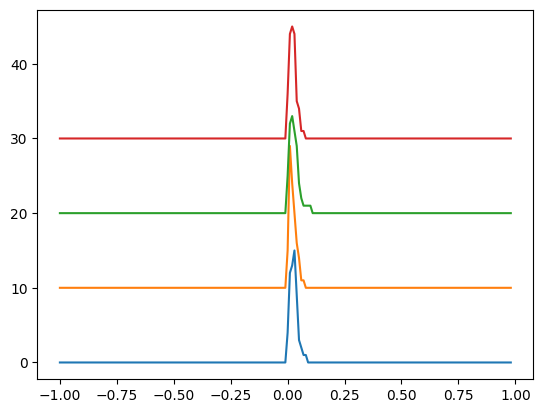

In [4]:
multiplier = 10

all_data = np.zeros((1860000,4))
all_sample_numbers = []
all_states = []

for ch in range(4):
    event_times = np.arange(1,61) + 0.25 * ch
     
    spike_offsets = gamma.rvs(3, size=event_times.size) * multiplier
    spike_times = event_times + spike_offsets / 1000

    h,b = np.histogram(spike_times - event_times, bins=np.arange(-1.0,1.0,0.01))
    plt.plot(b[:-1],h+10*ch)

    x = band_limited_noise(5, 3000, 30000, 30000) * 3000
    d = np.squeeze(np.tile(x, (1,62)))
    
    for t in spike_times:
        sample = (t* 30000).astype('int64')
        d[sample:sample+40] += wv * 0.5
        
    all_data[:,ch] = d
    
    sample_numbers = (event_times * 30000).astype('int64')
    states = np.ones(sample_numbers.shape, dtype='int16') * (ch + 1)
    off_sample_numbers = sample_numbers + 3000
    off_states = -np.ones(off_sample_numbers.shape, dtype='int16') * (ch + 1)
    
    all_sample_numbers.append(sample_numbers)
    all_sample_numbers.append(off_sample_numbers)
    all_states.append(states)
    all_states.append(off_states)
    
for ch in range(4):
    new_idx = (ch+1)%4
    copy = all_data[:-1500,new_idx] * 0.5
    all_data[1500:,ch] += copy
    


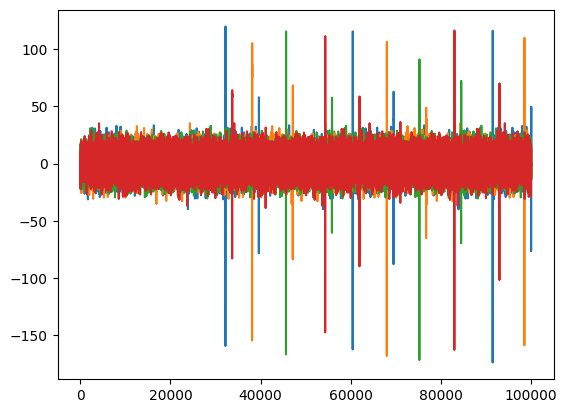

In [5]:
plt.plot(all_data[:100000,:])

In [6]:
# save event data

SN = np.concatenate(all_sample_numbers)
ST = np.concatenate(all_states)
order = np.argsort(SN)

final_sample_numbers = SN[order]
final_states = ST[order]

output_dir = r'C:\Users\joshs\Documents\Open Ephys\psth_testing\Record Node 105\experiment1\recording1\events\File_Reader-100.example_data\TTL'

np.save(os.path.join(output_dir, 'sample_numbers.npy'), final_sample_numbers)
np.save(os.path.join(output_dir, 'states.npy'), final_states)

In [7]:
# save continuous data

D = (np.tile(all_data, (1, 4)) / 0.195).astype('int16')

output_dir = r'C:\Users\joshs\Documents\Open Ephys\psth_testing\Record Node 105\experiment1\recording1\continuous\File_Reader-100.example_data'

D.tofile(os.path.join(output_dir, 'continuous.dat'))

sample_numbers = np.arange(D.shape[0], dtype='int64')

np.save(os.path.join(output_dir, 'sample_numbers.npy'), sample_numbers)

In [12]:
num_channels = 384
num_pixels = 1000
bytes_per_sample = 12

total_bytes = num_channels * num_pixels * bytes_per_sample * 10

print(total_bytes / 1e6)

46.08


In [13]:
283 - 260

23

In [14]:
1/20

0.05

In [15]:
3093 - 1035

2058

In [16]:
855 - 2058 - 1035

-2238

In [17]:
1085 / 3

361.6666666666667

In [19]:
np.pi / 2

1.5707963267948966